In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance
import pylab
import random
from monte_funcs import *
from IPython.display import clear_output
import datetime
import hurst

In [ ]:
vx = pd.read_csv('vixts.csv')
rates = np.random.lognormal(0,0.09,1000) - 1

In [ ]:
plt.hist(rates)

In [ ]:
[plt.plot(pnl_walk(100, 25, rates)) for i in range(10000)]

In [ ]:
pnl = pd.DataFrame([100,105,102,300,201,2011,302,2])
pnl.cummax()

In [ ]:
#(strat, starting_amt, max_draw, wait_after_stop, tkrs, rolling_lookback, n_paths, n_days_project):

In [ ]:
def test_hurst(ticker):
    dfs = sim_and_test('LongShort', 100, 0.10, 10, [f'{ticker}'], 2, 2500, 3)
    dfs[f'{ticker}'][f'{ticker}'] = yfinance.download(f'{ticker}')['Close']
    dfs[f'{ticker}']['hurst'] = dfs[f'{ticker}'][f'{ticker}'].rolling(100).apply(hurst_exp)
    dfs[f'{ticker}'] = dfs[f'{ticker}'].dropna(axis=0)
    dfs[f'{ticker}']['hurst_quantile'] = pd.qcut(dfs[f'{ticker}']['hurst'], q = 4)
    return dfs[f'{ticker}'].groupby('hurst_quantile').mean()
    

[*********************100%***********************]  1 of 1 completed
Strat Sharpe (2_1000_3_BMBL): 10.490702742325404, Buy and Hold Sharpe (BMBL): 6.129784949052302
Return Strat(%): 12.718070436411708, Return Buy and Hold(%): -29.775634485366425
0.33333333333325754
Anualized Return Strat(%): 0.43212404696929396, Anualized Return Buy and Hold(%): -0.6536912442647629
Anualized Vol Strat(%): 0.2946570060538922, Anualized Vol Buy and Hold(%): 0.40111616492832924


Strat Sharpe (2_1000_3_COIN): 15.76261519520772, Buy and Hold Sharpe (COIN): 7.8030733396203775
Return Strat(%): -23.226773151071455, Return Buy and Hold(%): -29.614034730788592
0.16666666666674246
Anualized Return Strat(%): -0.795233565256448, Anualized Return Buy and Hold(%): -0.878404801715009
Anualized Vol Strat(%): 0.38194349402186223, Anualized Vol Buy and Hold(%): 0.7345383581625926




{'BMBL':             2_1000_3_BMBL   Long_BMBL  Strat_Ret
 Date                                            
 2021-02-11     100.000000  100.000000        NaN
 2021-02-12      98.009888   98.009888  -1.990112
 2021-02-16      93.801496   93.801496  -4.208391
 2021-02-17      93.801496   90.949424   0.000000
 2021-02-18      93.801496   85.181896   0.000000
 ...                   ...         ...        ...
 2021-06-24     117.194233   72.265178  -3.474102
 2021-06-25     117.194233   71.897581   0.000000
 2021-06-28     117.194233   73.013055   0.000000
 2021-06-29     115.993806   72.265178  -1.200427
 2021-06-30     112.718070   70.224366  -3.275735
 
 [97 rows x 3 columns],
 'COIN':             2_1000_3_COIN   Long_COIN  Strat_Ret
 Date                                            
 2021-04-14     100.000000  100.000000        NaN
 2021-04-15      97.368421   97.368421  -2.631579
 2021-04-16      93.807020   93.807020  -3.561401
 2021-04-19      93.807020   91.204682   0.000000
 2021-04

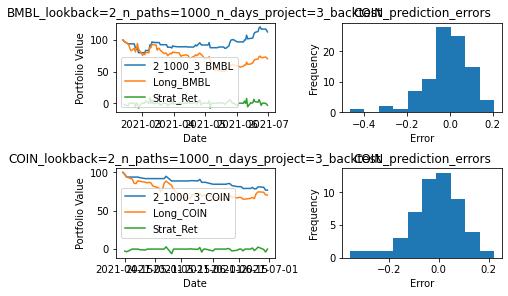

In [2]:
sim_and_test('Long', 100, 0.20, 1, ['BMBL','COIN'], 2,1000, 3)

In [ ]:
spy_df = df['SPY'].reset_index()
spy_df

In [ ]:
#vx['Date'] = [datetime.datetime.strptime(str(i) ,'%Y%m%d') for i in vx['Date']]
pnl_with_vix = spy_df.merge(vx[vx['Date'].between(str(df['SPY'].index[0]), str(df['SPY'].index[-1]))])

In [ ]:
plt.hist(pnl_with_vix['Strat_Ret'], bins = 35)

In [ ]:
pnl_with_vix['pnl_quantile'] = pd.qcut(pnl_with_vix['Strat_Ret'], q = 2)
grouped = pnl_with_vix.groupby('pnl_quantile').mean().iloc[:,3:].transpose()
for col in grouped:
    plt.plot(grouped[col], label = col)
plt.legend()

In [ ]:
pnl_with_vix['vix_1_quantile'] = pd.qcut(pnl_with_vix['VIX_1^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_1_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_1_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_2_quantile'] = pd.qcut(pnl_with_vix['VIX_2^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_2_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_2_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_3_quantile'] = pd.qcut(pnl_with_vix['VIX_3^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_3_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_3_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_6_quantile'] = pd.qcut(pnl_with_vix['VIX_6^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_6_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_6_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_9_quantile'] = pd.qcut(pnl_with_vix['VIX_9^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_9_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_9_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pnl_with_vix['vix_12_quantile'] = pd.qcut(pnl_with_vix['VIX_12^2'], q = 4)
grouped = pd.DataFrame(pnl_with_vix.groupby('vix_12_quantile').mean().iloc[:,2].transpose())
grouped = grouped.reset_index()

plt.bar([str(i) for i in grouped['vix_12_quantile']],grouped['Strat_Ret'], label = 'Strat Ret')
plt.legend()
grouped

In [ ]:
pairs = [[0.0204, 0.0342], [0.0227, 0.0335], [0.0245, 0.0385], [0.0283, 0.0418], 
[0.0307, 0.0431], [0.0142, 0.0322]] 
plt.plot([pair[0] for pair in pairs])
plt.plot([pair[1] for pair in pairs]) 

In [ ]:
pnl_with_vix

In [ ]:
plt.plot(pnls['5_50_2_AMZN'], label = 'Strat')
plt.plot(pnls['Long_AMZN'], label = 'Long AMZN')
plt.legend()

In [ ]:
yfinance.download('QQQ')

In [ ]:
qqq_df = pd.DataFrame(pnls)
qqq_df['Strat_Ret'] = qqq_df['5_50_5_QQQ'] - qqq_df['5_50_5_QQQ'].shift(1)

In [ ]:
def sharpe(ret, sd):
    return (ret)/sd

In [ ]:
total_ret = (qqq_df.iloc[-1]['5_50_5_QQQ'] - qqq_df.iloc[0]['5_50_5_QQQ'])/qqq_df.iloc[0]['5_50_5_QQQ']
qqq_df['pct_return'] = qqq_df.pct_change()['5_50_5_QQQ']

In [ ]:
np.mean(qqq_df['pct_return'])/np.std(qqq_df['pct_return'])

In [ ]:
np.mean(qqq_df['5_50_5_QQQ'])/np.std(qqq_df['5_50_5_QQQ'])

In [ ]:
np.mean(qqq_df['Long_QQQ'])/np.std(qqq_df['Long_QQQ'])

In [ ]:
qqq_df

In [ ]:
for key in pnls.keys():
    plt.plot(pnls[key], label = key)
    print(f'Sharpe({key}):{np.mean(pd.DataFrame(pnls[key])/np.std(pd.DataFrame(pnls[key])))}')
plt.legend()

In [ ]:
plt.plot(pnls['4_4'])

In [ ]:
pnl = [100000]
errors = []
pnl_spy = [100000]

for i in range(len(dta)-1):
    pnl_spy.append(pnl_spy[-1] * (1+dta.iloc[i+1]['Pct_Change']))
    if dta.iloc[i]['Close'] < dta.iloc[i]['E']:
        pnl.append(pnl[-1]*(1+dta.iloc[i+1]['Pct_Change']))
    else:
        pnl.append(pnl[-1])
        #pnl.append(pnl[i]*(1+(-1*dta.iloc[i]['Pct_Change'])))
    errors.append(dta.iloc[i]['Actual'] - dta.iloc[i]['E'])
plt.plot(pnl)
plt.plot(pnl_spy)

In [ ]:
print(np.mean(pnl)/np.std(pnl), np.mean(pnl_spy)/np.std(pnl_spy))

In [ ]:
df = pd.DataFrame()
df['PNL']= pnl
df['PNL_Pct_Change'] = df.pct_change()
df['PNL_Change'] = df['PNL'] - df['PNL'].shift(1)
df
#plt.hist(df['PNL_Change'], bins = 1000)
#plt.hist(df['PNL'], bins = 1000)
df
#np.mean(df['PNL'])/np.std(df['PNL'])

In [ ]:
plt.plot(dta['Close'])


In [ ]:
#simulated sp500
def pnl_walk(a, n, rates):
    # defining the number of steps
    
    # n must = lenrates

    #creating two array for containing x and y coordinate
    #of size equals to the number of size and filled up with 0's
    x = numpy.zeros(n)
    x[0] = a

    # filling the coordinates with random variables
    for i in range(1, n):
        rate = np.random.choice(rates)
        x[i] = x[i-1]*(1+rate)
    
    
    return x


In [ ]:
def simulate_rndm_pnl(n_sims, starting_val, steps, generated):
    ends = []
    sers = []
    for i in range(n_sims):
        ser = pnl_walk(starting_val, steps, generated)
        sers.append(ser)
        ends.append(ser[-1])
        #plt.plot(ser)
    
    return sers, ends
    #plt.ticklabel_format(style = 'plain')
    #print(f'Mean Ending Value = {np.mean(ends)}, Sd = {np.std(ends)/n_sims}')

In [ ]:
import pandas as pd
close_copy = close.copy()
cur = close_copy.iloc[-1]['log_return']
rolling_sd = close_copy.iloc[-1]['rolling_sd']
rolling_mean = close_copy.iloc[-1]['rolling_mean']
generated = np.random.normal(rolling_mean,rolling_sd,1000)
paths = simulate_rndm_pnl(1000, cur, 25,generated)
df = pd.DataFrame(paths).transpose()

In [ ]:
for col in df:
    plt.plot(df[col])

In [ ]:
data = 